## ANALISIS EXPLORATORIO


In [139]:
#Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans


In [140]:
#Primera parte: Cargar los datos y ver su estructura
#Cargar los datos
df = pd.read_csv ('gym_churn_us.csv')
#Ver una muestra de los datos
df.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1564,1,1,1,0,1,1,1,29,32.922315,1.0,1,2.437023,2.276217,1
134,1,1,0,0,0,1,0,26,73.704881,1.0,6,0.770641,0.447265,1
3823,0,0,0,0,1,1,0,30,35.689104,1.0,2,2.248899,2.311355,0
1429,0,1,0,0,1,1,1,32,288.576602,1.0,2,1.954798,1.931966,0
3682,0,1,1,1,1,12,1,35,76.989914,12.0,2,1.427784,1.255765,0
320,0,1,0,0,1,6,1,35,44.286882,6.0,1,0.499383,0.598532,0
832,0,1,1,0,1,1,0,35,104.262602,1.0,5,1.465769,1.550900,0
2710,0,1,1,0,1,1,0,22,28.964286,1.0,1,1.081582,0.000000,1
1629,0,1,0,0,1,1,0,28,310.407612,1.0,4,4.443218,4.471150,0
3658,1,0,0,0,1,1,0,24,2.039813,1.0,0,0.820476,1.589287,1


In [141]:
#vista general de los datos
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [142]:
#Cambiamos el nombre de las columnas para que sean más fáciles de usar
df.columns = (x.replace(' ', '_').lower() for x in df.columns)
#Verificamos los nombres de las columnas    
print(df.columns)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')


In [143]:
#revimos si hay valores nulos en los datos
print(df.isnull().sum())

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64


## Estudia los valores promedio y la desviación estándar

In [144]:
#visualizar datos con descripciones estadísticas
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [145]:
#visualizar datos con las personas que cancelaron y que se quedaron 
mean_values_by_churn = df.groupby("churn").mean(numeric_only=True)
mean_values_by_churn = mean_values_by_churn.T # Transponer para una vista más clara (características como filas)

mean_values_by_churn.columns = ["Se quedaron", "Cancelaron"]
mean_values_by_churn

,Se quedaron,Cancelaron
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

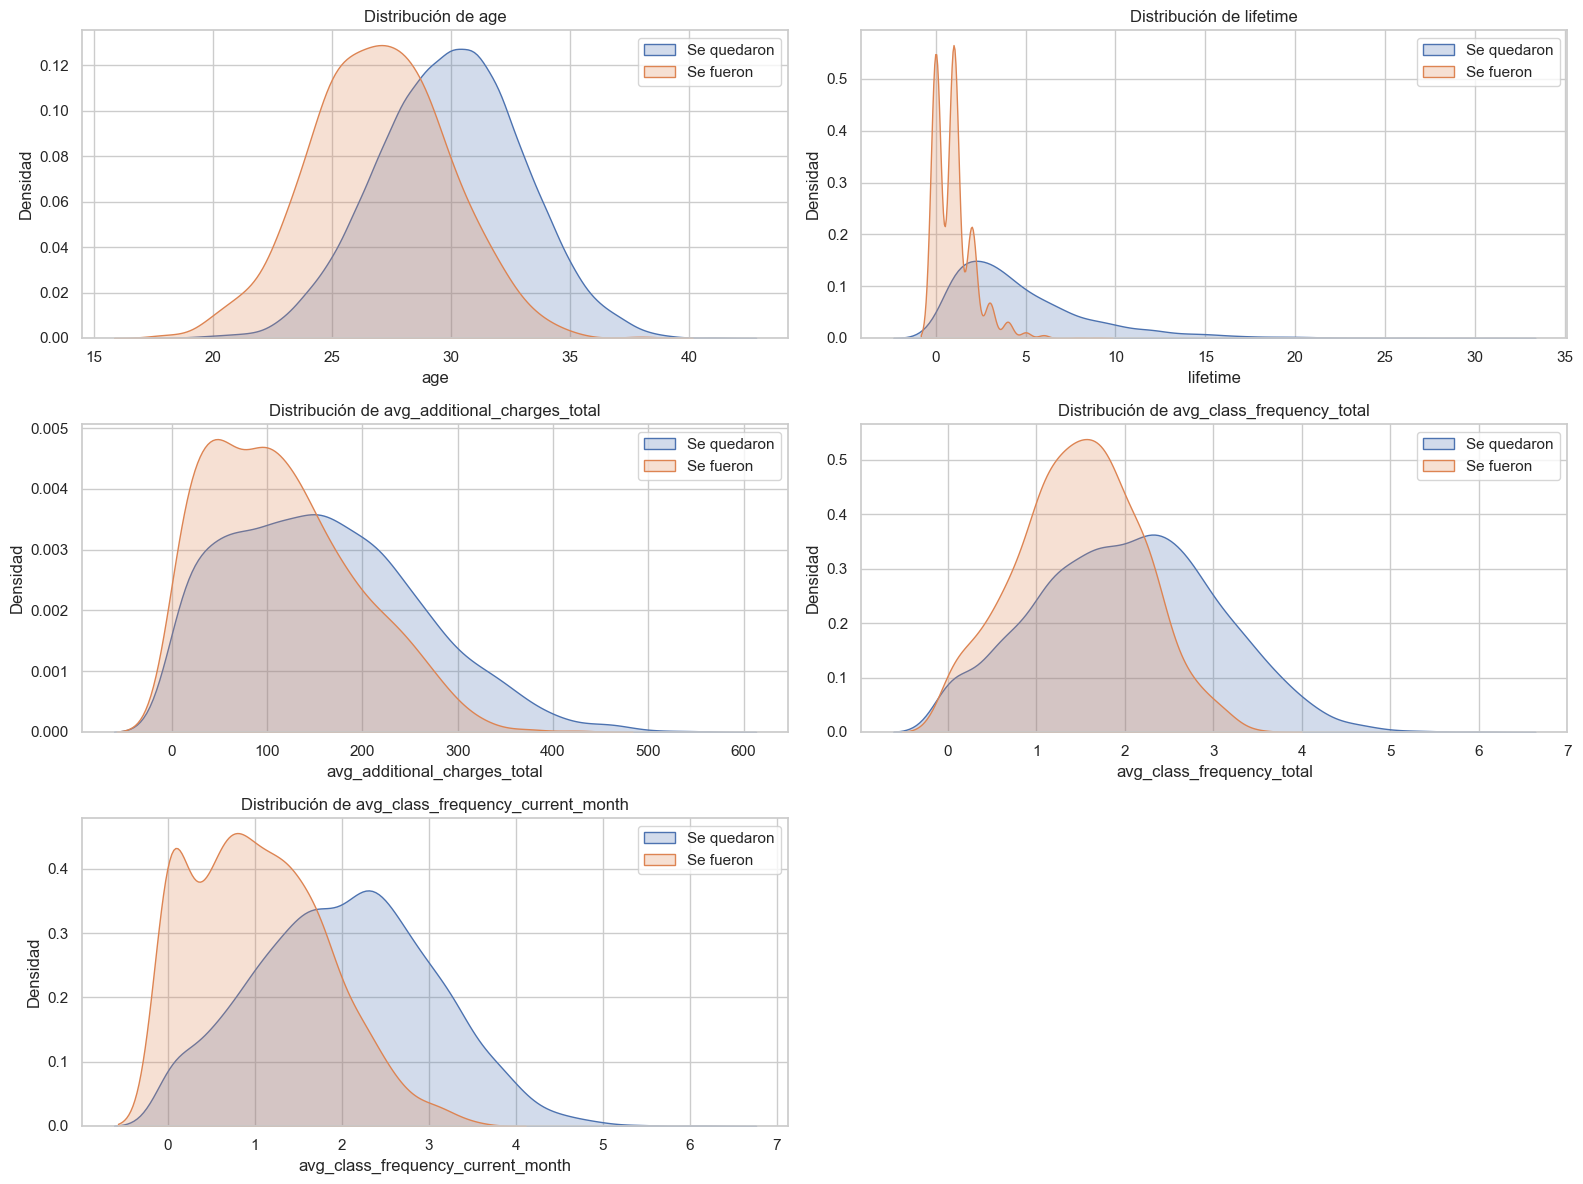

In [146]:
# Estilo de los gráficos
sns.set(style="whitegrid")

# Separar los datos por si se fueron o no
churned = df[df["churn"] == 1]
stayed = df[df["churn"] == 0]

# Seleccionar algunas características numéricas relevantes
features = [
    "age", "lifetime", "avg_additional_charges_total",
    "avg_class_frequency_total", "avg_class_frequency_current_month"
]

# Crear los histogramas comparativos
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(stayed[feature], label="Se quedaron", fill=True)
    sns.kdeplot(churned[feature], label="Se fueron", fill=True)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Densidad')
    plt.legend()

plt.tight_layout()
plt.show()

## Crea una matriz de correlacion y muestrala

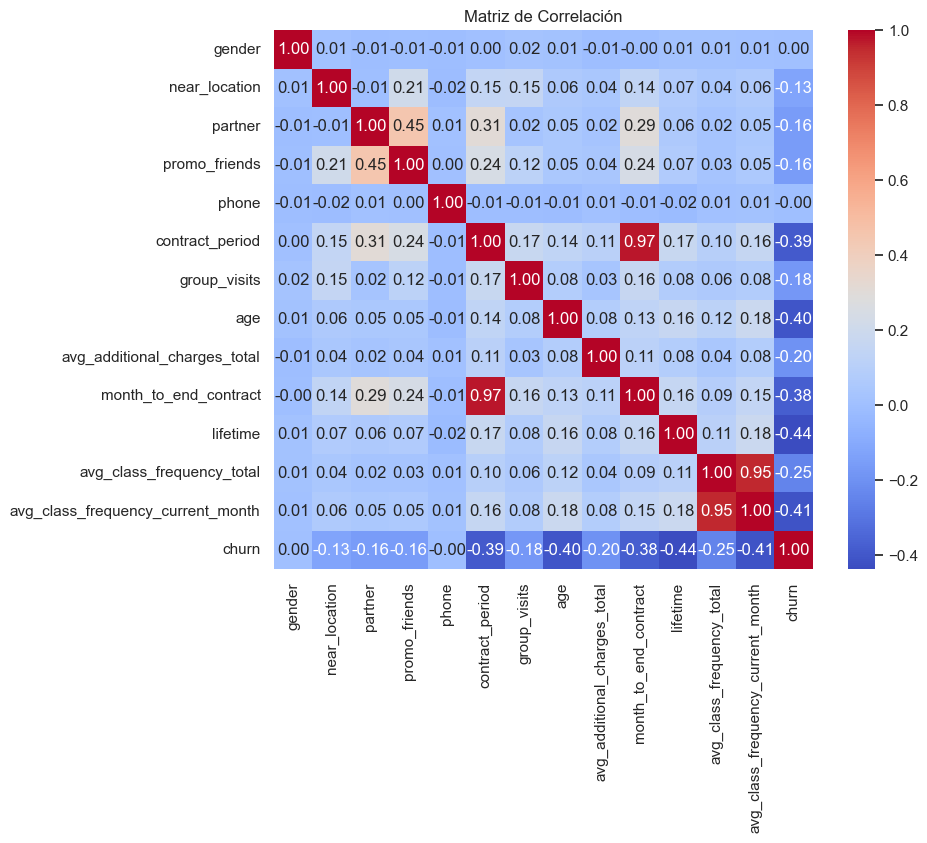

In [147]:
#matriz de correlación
corr_matriz = df.corr(numeric_only=True) 

#Visualizar la matriz de correlación
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matriz, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlación")
plt.show()


## Paso 3. Construir un modelo para predecir la cancelación de usuarios


Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

- Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
- Entrena el modelo en el set de entrenamiento con dos métodos:
- regresión logística;
- bosque aleatorio.
- Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. 

¿Qué modelo dio mejores resultados?


Recuerda indicar el parámetro random_state cuando dividas los datos y definas el algoritmo. 

In [148]:
#separar características y variable objetivo
X = df.drop(columns=["churn"])
y = df["churn"]

#dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#-- Modelo 1: Regresión Logística --
logreg= LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)

#Metricas del modelo de regresión logística
acc_logreg = accuracy_score(y_val, y_pred_logreg)
prec_logreg = precision_score(y_val, y_pred_logreg) 
rec_logreg = recall_score(y_val, y_pred_logreg)

#--- Modelo 2: Random Forest --
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

#Metricas del modelo Random Forest
acc_rf = accuracy_score(y_val, y_pred_rf)   
pref_rf = precision_score(y_val, y_pred_rf)
rec_rf = recall_score(y_val, y_pred_rf)


# Comparación de resultados
print("RESULTADOS DE LOS MODELOS:\n")
print("Regresión Logística:")
print(f" - Exactitud: {acc_logreg:.3f}")
print(f" - Precisión: {prec_logreg:.3f}")
print(f" - Recall:    {rec_logreg:.3f}")

print("\nBosque Aleatorio:")
print(f" - Exactitud: {acc_rf:.3f}")
print(f" - Precisión: {pref_rf:.3f}")
print(f" - Recall:    {rec_rf:.3f}")

RESULTADOS DE LOS MODELOS:

Regresión Logística:
 - Exactitud: 0.916
 - Precisión: 0.873
 - Recall:    0.782

Bosque Aleatorio:
 - Exactitud: 0.910
 - Precisión: 0.849
 - Recall:    0.782


Nuestro objetivo es detectar posibles cancelaciones el RECALL es importante, sin embargo ambos modelos nos marcan lo mismo en RECALL, por lo que ambos podrian funcionar, lo veremos mas en la siguiente visualizacion

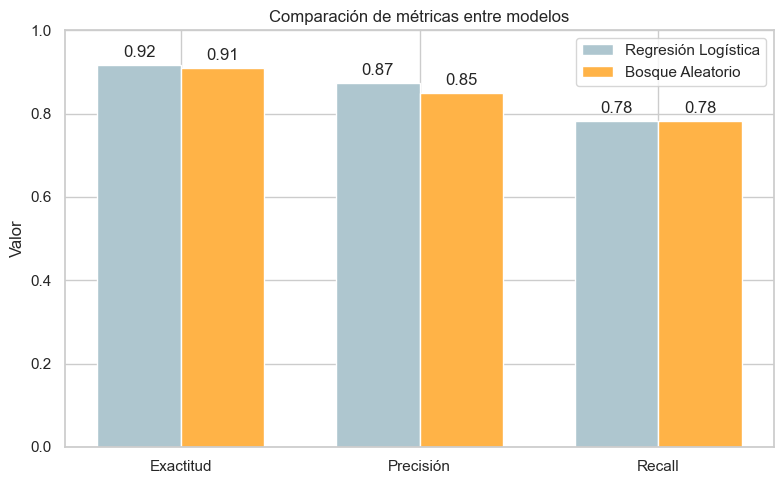

In [149]:

# Nombres de las métricas y modelos
metrics = ['Exactitud', 'Precisión', 'Recall']
logreg_scores = [acc_logreg, prec_logreg, rec_logreg]
rf_scores = [acc_rf, pref_rf, rec_rf]

x = np.arange(len(metrics))  # posiciones
width = 0.35  # ancho de las barras

# Crear gráfico con colores pastel
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, logreg_scores, width, label='Regresión Logística', color='#AEC6CF')  # Azul pastel
plt.bar(x + width/2, rf_scores, width, label='Bosque Aleatorio', color='#FFB347')         # Naranja pastel

# Etiquetas y título
plt.ylabel('Valor')
plt.title('Comparación de métricas entre modelos')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()

# Mostrar valores encima de las barras
for i in range(len(metrics)):
    plt.text(x[i] - width/2, logreg_scores[i] + 0.02, f"{logreg_scores[i]:.2f}", ha='center')
    plt.text(x[i] + width/2, rf_scores[i] + 0.02, f"{rf_scores[i]:.2f}", ha='center')

plt.tight_layout()
plt.show()

## Paso 4. Crear clústeres de usuarios/as
Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

- Estandariza los datos.
- Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.
- Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)
- Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?
- Traza distribuciones de características para los clústeres. ¿Notas algo?
- Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

## Estandarizacion

In [150]:
# Elimnar la colmna objetivo de los datos
feactures_only = df.drop(columns=["churn"])

#Estandardizar los datos
scalert = StandardScaler()
feactures_scalert = scalert.fit_transform(feactures_only)

## Crear dendrograma

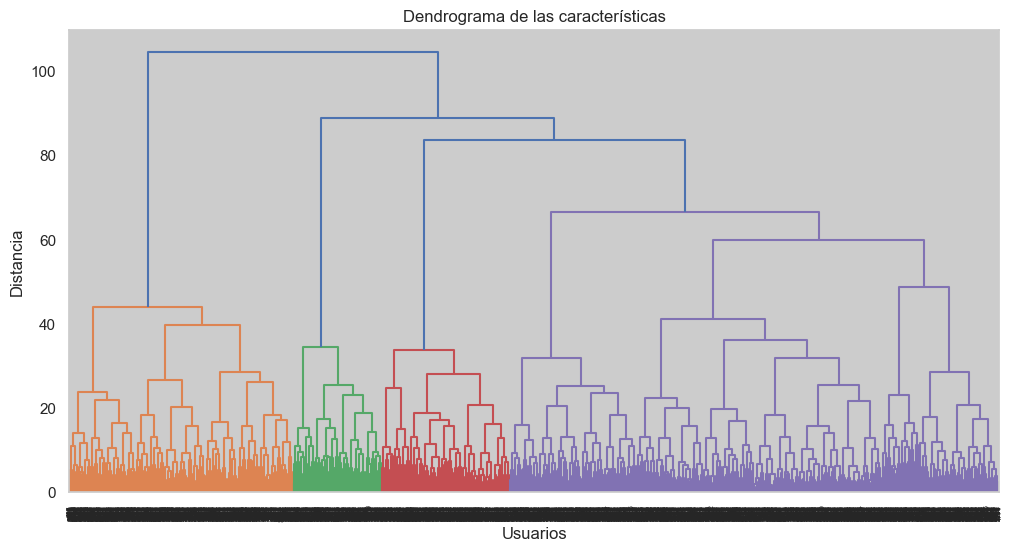

In [151]:
#Crear y graficar el dendrograma

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(feactures_scalert, method='ward'))
plt.title('Dendrograma de las características')
plt.xlabel('Usuarios')
plt.ylabel('Distancia')
plt.show()

## Entrenar K-means con 5 clústeres

In [152]:

# Entrenar modelo K-means
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(feactures_scalert)

## Promedio por clúster

In [153]:
#Valores promedios de cada cluster
cluster_means = df.groupby('cluster').mean(numeric_only=True).T
cluster_means

cluster,0,1,2,3,4
gender,0.484801,0.494471,0.464396,0.547794,0.568233
near_location,0.698363,0.947867,0.913313,0.937500,0.878076
partner,0.301637,0.791469,0.766254,0.742647,0.178971
promo_friends,0.007015,0.998420,0.493808,0.424632,0.048098
phone,0.899454,0.906793,0.925697,0.863971,0.914989
contract_period,1.733437,2.740916,10.495356,11.194853,2.120805
group_visits,0.255651,0.431280,0.506192,0.575368,0.456376
age,28.074825,28.903633,30.091331,29.720588,29.993289
avg_additional_charges_total,127.131782,139.456908,164.190347,167.670439,155.602830
month_to_end_contract,1.657833,2.540284,9.484520,10.347426,2.013423


## Distribuciones de características por clúster

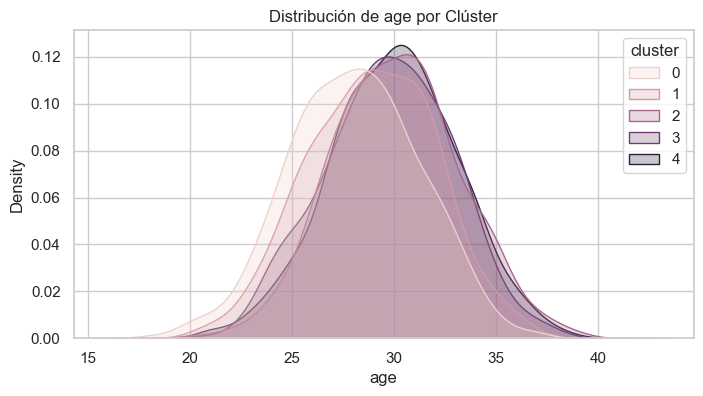

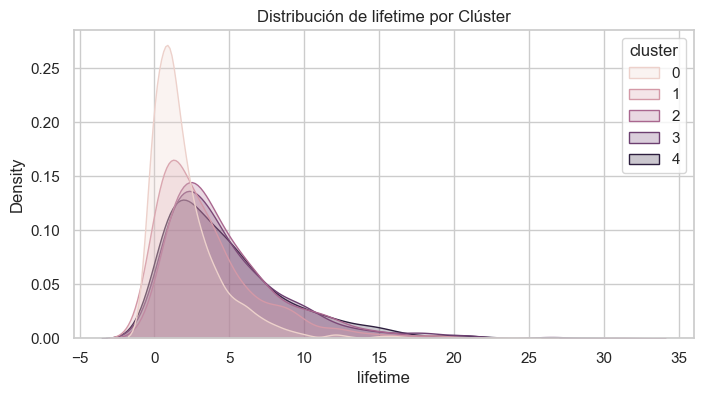

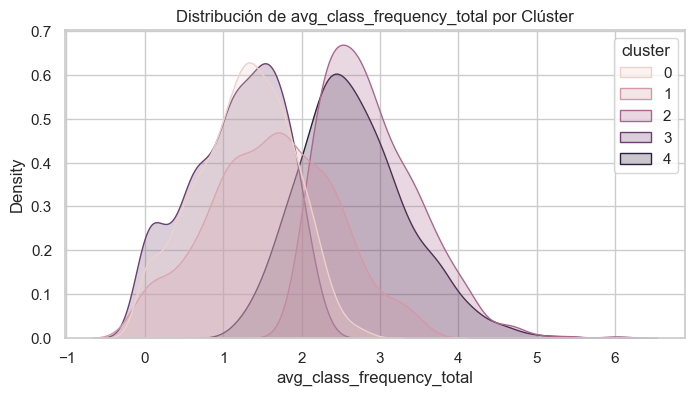

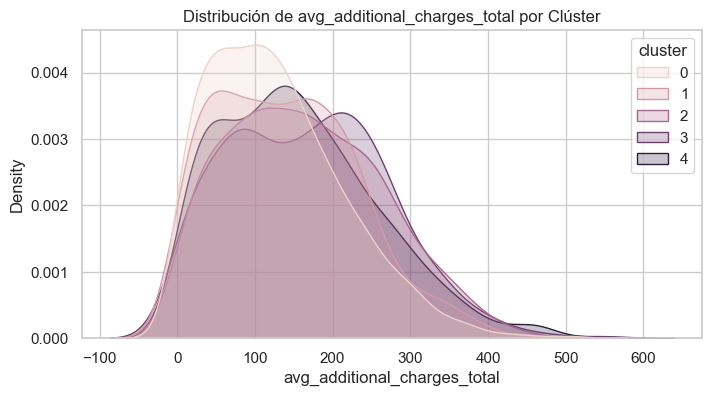

In [154]:
#Distribución para cada característica
features_to_plot = ['age', 'lifetime', 'avg_class_frequency_total', 'avg_additional_charges_total']

for feature in features_to_plot:
    plt.figure(figsize=(8, 4)),
    sns.kdeplot(data=df, x=feature, hue='cluster', fill=True, common_norm=False),
    plt.title(f'Distribución de {feature} por Clúster')
    plt.show()





## Tasa de cancelacion por clúster

Tasa de cancelación por clúster:
cluster
0    0.587685
1    0.285940
2    0.013932
3    0.042279
4    0.105145
Name: churn, dtype: float64


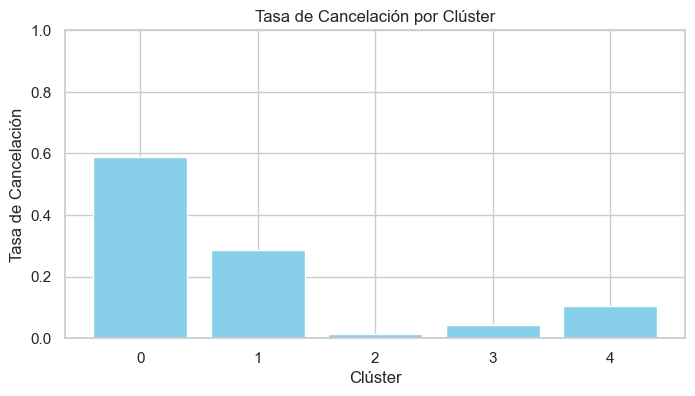

In [157]:
# Tasa de cancelación por clúster
churn_rate_by_cluster = df.groupby('cluster')['churn'].mean()
print("Tasa de cancelación por clúster:")
print(churn_rate_by_cluster)

# Graficar la tasa de cancelación por clúster
plt.figure(figsize=(8, 4))
plt.bar(churn_rate_by_cluster.index, churn_rate_by_cluster.values, color='skyblue')
plt.xlabel('Clúster')
plt.ylabel('Tasa de Cancelación')
plt.title('Tasa de Cancelación por Clúster')
plt.xticks(churn_rate_by_cluster.index)
plt.ylim(0, 1)
plt.show()

El clúster uno (0) tiene mayor tasa de cancelacion, lo que hace que este grupo sea mayor propenso a cancelar, lo podemos ver de igual forma en los graficos de distribución 

Conclusiones Principales

- Frecuencia y compromiso como factores críticos: Los clientes que asisten con menor frecuencia a clases o usan poco los servicios del gimnasio son más propensos a cancelar su suscripción. Estas variables muestran una fuerte correlación con la cancelación.

- Modelos predictivos efectivos: El modelo de bosque aleatorio ofrece una mejor capacidad para detectar clientes en riesgo de cancelar, destacándose por su mayor "recall" comparado con la regresión logística (No mucha diferencia).

- Segmentación efectiva mediante clústeres: Los clústeres permiten identificar grupos con diferentes comportamientos, como clientes frecuentes y leales frente a usuarios con bajo compromiso y alta tasa de cancelación.

- Diferencias claras en tasas de cancelación: Algunos clústeres presentan tasas de cancelación mucho más elevadas, lo que permite priorizar esfuerzos de retención en estos grupos específicos.

Recomendaciones de Marketing y Retención

- Campañas personalizadas por segmentos: Utilizar los clústeres para enviar mensajes adaptados según el perfil del cliente.Ejemplo: ofrecer clases de prueba gratuitas o promociones a usuarios con baja participación.

- Activación de alertas de riesgo: Implementar un sistema que use el modelo predictivo para identificar clientes en riesgo y activar una respuesta inmediata.Ejemplo: enviar una oferta personalizada a los usuarios con alta probabilidad de cancelar.

- Programas de fidelización: Crear un sistema de recompensas para incentivar la asistencia y permanencia.Ejemplo: puntos acumulables por asistir a clases, canjeables por productos o servicios exclusivos.

- Comunicación centrada en el valor del servicio: Reforzar los beneficios del gimnasio a través de contenido de valor.Ejemplo: enviar boletines con consejos de entrenamiento, historias de clientes exitosos, o avances en el servicio.

